# [Game Theory | Mixed strategy] Card game "Le Her"
**Number of players:** 2 (Dealer & Reciever)

**Number of cards:** 52 (ordinary deck)

**Order of value:** A, 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K 

**Game process:**

> Dealer gives a card from deck at random to a Reciever, and takes one himself; neither player sees the other's card. The main object is for each to obtain a higher card than his opponent. If the Reciever is not content with his card, he may compel the Dealer to change with him; but if the Dealer has a King, he is allowed to retain it. If the Dealer is not content with the card which he at first obtained, or which he has been compelled to take from the Reciever, he is allowed to change it for another taken out of the deck at random; but if the card he then draws is a King, he is not allowed to have it, but must keep the card which he held after the Reciever exercised his option. The two players then compare cards, and the player with the higher card wins. If the Dealer and Reciever have cards of the same calue, the Dealer wins.
>
> -- <cite>Melvin Dresher "Games of Strategy. Theory and Applications"</cite>


## Step 1. The heatmap of the Dealer's win rate depending on the strategies
Both players have the same strategies: to hold i-th (or j-th) card and above.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations

In [2]:
deck = [num for num in range(1, 53)]
num_of_permut = 52 * 51 * 50
dealer_win_matrix = [[0 for num_1 in range(14)] for num_2 in range(14)]

for reciever_strategy in range(1, 14):
    for dealer_strategy in range(1, 14):
        dealer_win = 0
        for reciever, dealer, free in permutations(deck, 3):
            reciever = 13 if reciever % 13 == 0 else reciever % 13
            dealer = 13 if dealer % 13 == 0 else dealer % 13
            free = 13 if free % 13 == 0 else free % 13
            ex_dealer = int(dealer)
            
            if reciever < reciever_strategy and dealer != 13:
                reciever, dealer = dealer, reciever
                if dealer >= ex_dealer:
                    dealer_win += 1
                else:
                    if free != 13:
                        dealer, free = free, dealer
                    if dealer >= reciever:
                        dealer_win += 1
            else:
                if dealer < dealer_strategy and free != 13:
                    dealer, free = free, dealer
                if dealer >= reciever:
                    dealer_win += 1
        
        dealer_win_matrix[reciever_strategy][dealer_strategy] = dealer_win / num_of_permut

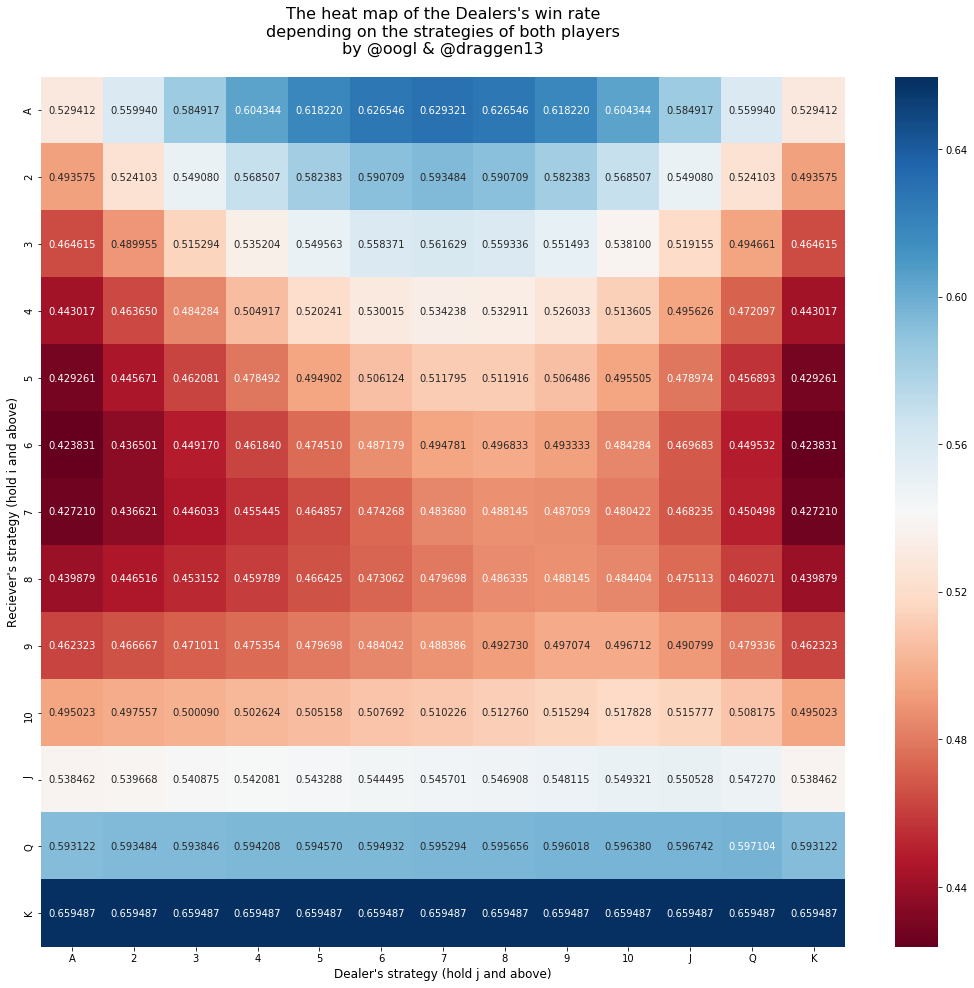

In [3]:
card_names = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
dwm = np.array(dealer_win_matrix)
plt.figure(figsize=(18, 16))
sns.heatmap(dwm[1:, 1:], annot = True, cmap="RdBu", fmt="f")
plt.xticks([i + 0.5 for i in range(13)], card_names)
plt.yticks([i + 0.5 for i in range(13)], card_names)
plt.ylabel("Reciever's strategy (hold i and above)", fontsize=12)
plt.xlabel("Dealer's strategy (hold j and above)", fontsize=12)
plt.title("The heat map of the Dealers's win rate\ndepending on the strategies of both players\nby @oogl & @draggen13\n",
          fontsize=16)
plt.show()

## Step 2. Removing dominated strategies
First, the Reciever will try to find the best strategy, removing dominated strategies (if every probability of the Dealer's win in one row is higher than in the other, it has to be removed as inefficient). Then the same the Dealer will do. If nessesary, the Resiever will try again, and so on.

### Step 2.1
<img src="pictures/le_her_removing_strategies_1.png">

### Step 2.2
<img src="pictures/le_her_removing_strategies_2.png">

### Step 2.3
<img src="pictures/le_her_removing_strategies_3.png">

## Step 3. Obtaining the optimal strategy
The cells left above shows us that the is no clear optimal strategy for both of the players. That means that they will need to have mixed strategies with probabilities of following each of the particular strategies:

The Reciever:
- to hold 7 and above
- to hold 8 and above

The Dealer:
- to hold 8 and above
- to hold 9 and above

Solving the 2x2 game, we can calculate such probabilities with the help of these **formulas**:

- The matrix of our probabilities:
$
\quad\quad
\begin{Vmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{Vmatrix}
$


- Reciever probabilities:
$
\quad\quad
p_{1} = \frac{a_{22} - a_{21}}{a_{11} + a_{22} - a_{21} - a_{12}}
\quad\quad
p_{2} = \frac{a_{11} - a_{12}}{a_{11} + a_{22} - a_{21} - a_{12}}
$


- Subcalc:
$
\quad\quad
v = \frac{a_{11} * a_{22} - a_{21} * a_{12}}{a_{11} + a_{22} - a_{21} - a_{12}}
$


- Dealer probabilities:
$
\quad\quad
q_{1} = \frac{v - a_{12}}{a_{11} - a_{12}}
\quad\quad
q_{2} = \frac{a_{11} - v}{a_{11} - a_{12}}
$

In [4]:
A = dwm[7:9,8:10]

p_1 = (A[1][1] - A[1][0]) / (A[0][0] + A[1][1] - A[1][0] - A[0][1])
p_2 = (A[0][0] - A[0][1]) / (A[0][0] + A[1][1] - A[1][0] - A[0][1])

v = (A[0][0] * A[1][1] - A[1][0] * A[0][1]) / (A[0][0] + A[1][1] - A[1][0] - A[0][1])

q_1 = (v - A[0][1]) / (A[0][0] - A[0][1])
q_2 = (A[0][0] - v) / (A[0][0] - A[0][1])

print("OPTIMAL STRATEGIES:")
print("The Reciever:  {0:.3f}, {1:.3f}".format(p_1, p_2))
print("The Dealer:    {0:.3f}, {1:.3f}".format(q_1, q_2))
print("\nTHE PRICE OF THE GAME:")
print("The value for the Reciever:  {0:.4f}".format(v))
print("The value for the Dealer:    {0:.4f}".format(1 - v))
print("\nPROBABILITIES OF SUCCESS:")
print("The Reciever:  {0:.4f}".format(1 - v))
print("The Dealer:    {0:.4f}".format(v))

OPTIMAL STRATEGIES:
The Reciever:  0.625, 0.375
The Dealer:    0.375, 0.625

THE PRICE OF THE GAME:
The value for the Reciever:  0.4875
The value for the Dealer:    0.5125

PROBABILITIES OF SUCCESS:
The Reciever:  0.5125
The Dealer:    0.4875


## Step 4. Conclusion

>Applying the minimax principle, we can determine that optimal strategy for the Dealer dictates mixing his two strategies in the ratio of 3:5. Reciever's optimal strategy is ($5/8, 3/8$). Probability of success for the Dealer is ~0.4875 and therefore 0.5125 for the Reciever, an expectation (for the Dealer) of -0.025. Although it may appear that the advantage lies with the Dealer since he wins the ties, the reverse is true owing to the greater ability of Reciever to influence the game's outcome.
>
> -- <cite>Richard Epstein "The Theory of Gambling and Statistical Logic."</cite>